In [ ]:
import os 
from tqdm import tqdm
dossier = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted'

#Potentiellement plus pratique d'utiliser des listes de mots 
# Ou des listes de listes de mots (une liste par texte) pour pouvoir réaliser des comparaisons

import os
from tqdm import tqdm

batch_size = 1000
fichier_progression = 'C:/Users/portable_laura/Desktop/memoire_prod_finale/data/progress.txt'
fichier_stopword = 'french_stopwords.txt'

# Lister les fichiers valides
fichiers_txt = [f for f in sorted(os.listdir(dossier)) 
                if f.endswith('.txt') and f != fichier_stopword]

if os.path.exists(fichier_progression):
    with open(fichier_progression, 'r') as f:
        start_index = int(f.read().strip())
else:
    start_index = 0

end_index = min(start_index + batch_size, len(fichiers_txt))
batch = fichiers_txt[start_index:end_index]

# Lire les fichiers du lot actuel
longue_chaine = ''
for fichier in tqdm(batch, desc=f"Traitement des fichiers {start_index} à {end_index-1}"):
    with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
        longue_chaine += f.read()

# Sauvegarder la nouvelle progression
with open(fichier_progression, 'w') as f:
    f.write(str(end_index))


print(f"Terminé : {len(batch)} fichiers traités.")
if end_index < len(fichiers_txt):
    print(f"Relance le script pour traiter les fichiers {end_index} à {min(end_index+batch_size, len(fichiers_txt))-1}")
else:
    print("Tous les fichiers ont été traités.")


Traitement des fichiers 7000 à 7165: 100%|██████████| 166/166 [00:10<00:00, 15.11it/s]

Terminé : 166 fichiers traités.
Tous les fichiers ont été traités.


In [ ]:
import os
from tqdm import tqdm 


def ouvrir_decennie(chemin,decennie):
    texte_fin = ''

    fichiers = [f for f in os.listdir(chemin) if f.endswith('.txt')]
    fichiers_decennie = []

    for fichier in fichiers:
        try:
            annee = int(fichier.split('-')[0])
            if decennie <= annee < decennie + 10:
                fichiers_decennie.append(fichier)
        except ValueError:
            print(f"Nom de fichier ignoré : {fichier}")

    fichiers_decennie.sort()

    for fichier in tqdm(fichiers_decennie):
        chemin = os.path.join(dossier, fichier)
        with open(chemin, 'r', encoding='utf-8') as f:
            texte_fin += f.read()

    print(f"{len(fichiers_decennie)} fichiers chargés pour la décennie {decennie}s.")
    return texte_fin


#===============================================
decennie = 1880
chemin = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted'

#===============================================

longue_chaine_decennie = ouvrir_decennie(chemin,decennie)


1168 fichiers chargés pour la décennie 1880s.


In [ ]:
len(longue_chaine_decennie)

48804056

In [25]:
import re
from collections import defaultdict
from tqdm import tqdm

def similarite_texte(texte1, texte2, seuil=0.8):
    """Mesure la similarité entre deux textes avec la distance de Jaccard"""
    # Découper le texte en trigrammes (ou n-grammes de taille 3)
    #===============================================
    n = 3
    #Paramètre usuel mais pouvant être modifié
    #===============================================

    def get_ngrams(texte, n):
        return set([texte[i:i+n] for i in range(len(texte) - n + 1)])

    ngrams1 = get_ngrams(texte1, n)
    ngrams2 = get_ngrams(texte2, n)


    intersection = len(ngrams1.intersection(ngrams2))
    union = len(ngrams1.union(ngrams2))
    #Calcul de la similarité avec la distance de Jaccard
    return intersection / union if union != 0 else 0

def compter_cooccurrences(texte, mot1, mot2, taille_fenetre=5, seuil_similarite=0.8):
    # Nettoyage du texte
    texte = texte.lower()
    mots = re.findall(r'\b\w+\b', texte)

    compteur = 0
    occurences = []
    for i in range(len(mots) - taille_fenetre + 1):
        fenetre = mots[i:i + taille_fenetre]
        if {mot1, mot2}.issubset(set(fenetre)):
            compteur += 1
            # Mettre en évidence les mots dans la fenêtre
            fenetre_mise_en_evidence = [
                f"**{mot}**" if mot == mot1 or mot == mot2 else mot for mot in fenetre
            ]
            fenetre_texte = " ".join(fenetre_mise_en_evidence)

            # Comparer la fenêtre actuelle avec les fenêtres précédentes
            if all(similarite_texte(fenetre_texte, occ) < seuil_similarite for occ in occurences):
                occurences.append(fenetre_texte)

    return compteur, occurences


#===========================================================
texte = longue_chaine 
mot1 = "travaux"
mot2 = "canal"
#===========================================================
#Taille de la fenêtre pouvant être modifiée
resultat, occurences = compter_cooccurrences(texte, mot1, mot2, 30, 0.8)
#===========================================================

print(f"Le nombre de cooccurrences de '{mot1}' et '{mot2}' est : {resultat}")

print("\nVoici les fenêtres où les mots coexistent (sans répétitions) :")
for occurence in occurences:
    print(f"- {occurence}")


Le nombre de cooccurrences de 'travaux' et 'canal' est : 4828

Voici les fenêtres où les mots coexistent (sans répétitions) :
- de commissaire du gouvernement pour assister le ministre des **travaux** publics devant la chambre des députés et devant le sénat dans la discussion du projet de loi relatif au **canal**
- pour assister le ministre des **travaux** publics devant la chambre des députés et devant le sénat dans la discussion du projet de loi relatif au **canal** de dombasle à saint
- des députés et devant le sénat dans la discussion du projet de loi relatif au **canal** de dombasle à saint dié art 2 le ministre des **travaux** publics est chargé
- sénat dans la discussion du projet de loi relatif au **canal** de dombasle à saint dié art 2 le ministre des **travaux** publics est chargé de l exécution du présent
- du projet de loi relatif au **canal** de dombasle à saint dié art 2 le ministre des **travaux** publics est chargé de l exécution du présent décret fait à paris
- au **ca

In [24]:
import re
from collections import defaultdict
from tqdm import tqdm

def similarite_texte(texte1, texte2, seuil=0.8):
    """Mesure la similarité entre deux textes avec la distance de Jaccard"""
    n = 3  # taille des n-grammes
    def get_ngrams(texte, n):
        return set([texte[i:i+n] for i in range(len(texte) - n + 1)])

    ngrams1 = get_ngrams(texte1, n)
    ngrams2 = get_ngrams(texte2, n)

    intersection = len(ngrams1.intersection(ngrams2))
    union = len(ngrams1.union(ngrams2))

    return intersection / union if union != 0 else 0

def compter_cooccurrences(texte, mot1, mot2, taille_fenetre=5, seuil_similarite=0.8):
    texte = texte.lower()
    mots = re.findall(r'\b\w+\b', texte)

    compteur = 0
    occurences = []

    for i in tqdm(range(len(mots) - taille_fenetre + 1)):
        fenetre = mots[i:i + taille_fenetre]

        if {mot1, mot2}.issubset(set(fenetre)):
            fenetre_simple = " ".join(fenetre)

            # Vérifie que cette fenêtre n'est pas trop similaire aux précédentes
            if all(similarite_texte(fenetre_simple, re.sub(r'\*\*', '', occ)) < seuil_similarite for occ in occurences):
                compteur += 1
                fenetre_mise_en_evidence = [
                    f"**{mot}**" if mot == mot1 or mot == mot2 else mot for mot in fenetre
                ]
                occurences.append(" ".join(fenetre_mise_en_evidence))

    return compteur, occurences

#===========================================================
texte = longue_chaine  # Assure-toi que cette variable est bien définie avant
mot1 = "travaux"
mot2 = "canal"
#===========================================================

resultat, occurences = compter_cooccurrences(texte, mot1, mot2, 30, 0.8)

print(f"\nLe nombre de cooccurrences de '{mot1}' et '{mot2}' est : {resultat}\n")
print("Voici les fenêtres où les mots coexistent (sans répétitions) :")
for occurence in occurences:
    print(f"- {occurence}")


100%|██████████| 34462205/34462205 [05:53<00:00, 97500.27it/s] 



Le nombre de cooccurrences de 'travaux' et 'canal' est : 1002

Voici les fenêtres où les mots coexistent (sans répétitions) :
- de commissaire du gouvernement pour assister le ministre des **travaux** publics devant la chambre des députés et devant le sénat dans la discussion du projet de loi relatif au **canal**
- pour assister le ministre des **travaux** publics devant la chambre des députés et devant le sénat dans la discussion du projet de loi relatif au **canal** de dombasle à saint
- des députés et devant le sénat dans la discussion du projet de loi relatif au **canal** de dombasle à saint dié art 2 le ministre des **travaux** publics est chargé
- sénat dans la discussion du projet de loi relatif au **canal** de dombasle à saint dié art 2 le ministre des **travaux** publics est chargé de l exécution du présent
- du projet de loi relatif au **canal** de dombasle à saint dié art 2 le ministre des **travaux** publics est chargé de l exécution du présent décret fait à paris
- au **c

In [ ]:
import spacy
from collections import Counter

nlp = spacy.load("fr_core_news_md")
nlp.max_length = 600000

def cooccurrence_spacy_par_chunks(texte, mot1, mot2, taille_chunk=500_000):
    total_cooccurrences = 0
    texte = texte.lower()

    # Découpage du texte en morceaux
    for i in range(0, len(texte), taille_chunk):
        chunk = texte[i:i+taille_chunk]
        doc = nlp(chunk)
        for phrase in doc.sents:
            tokens = [token.text for token in phrase]
            if mot1 in tokens and mot2 in tokens:
                total_cooccurrences += 1

    return total_cooccurrences


#================================================
texte = longue_chaine  # Texte très long
mot1 = "canal"
mot2 = "travaux"
#================================================

res = cooccurrence_spacy_par_chunks(texte, mot1, mot2)
print(f"Nombre de phrases contenant '{mot1}' et '{mot2}': {res}")


KeyboardInterrupt: 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\portable_laura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\portable_laura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


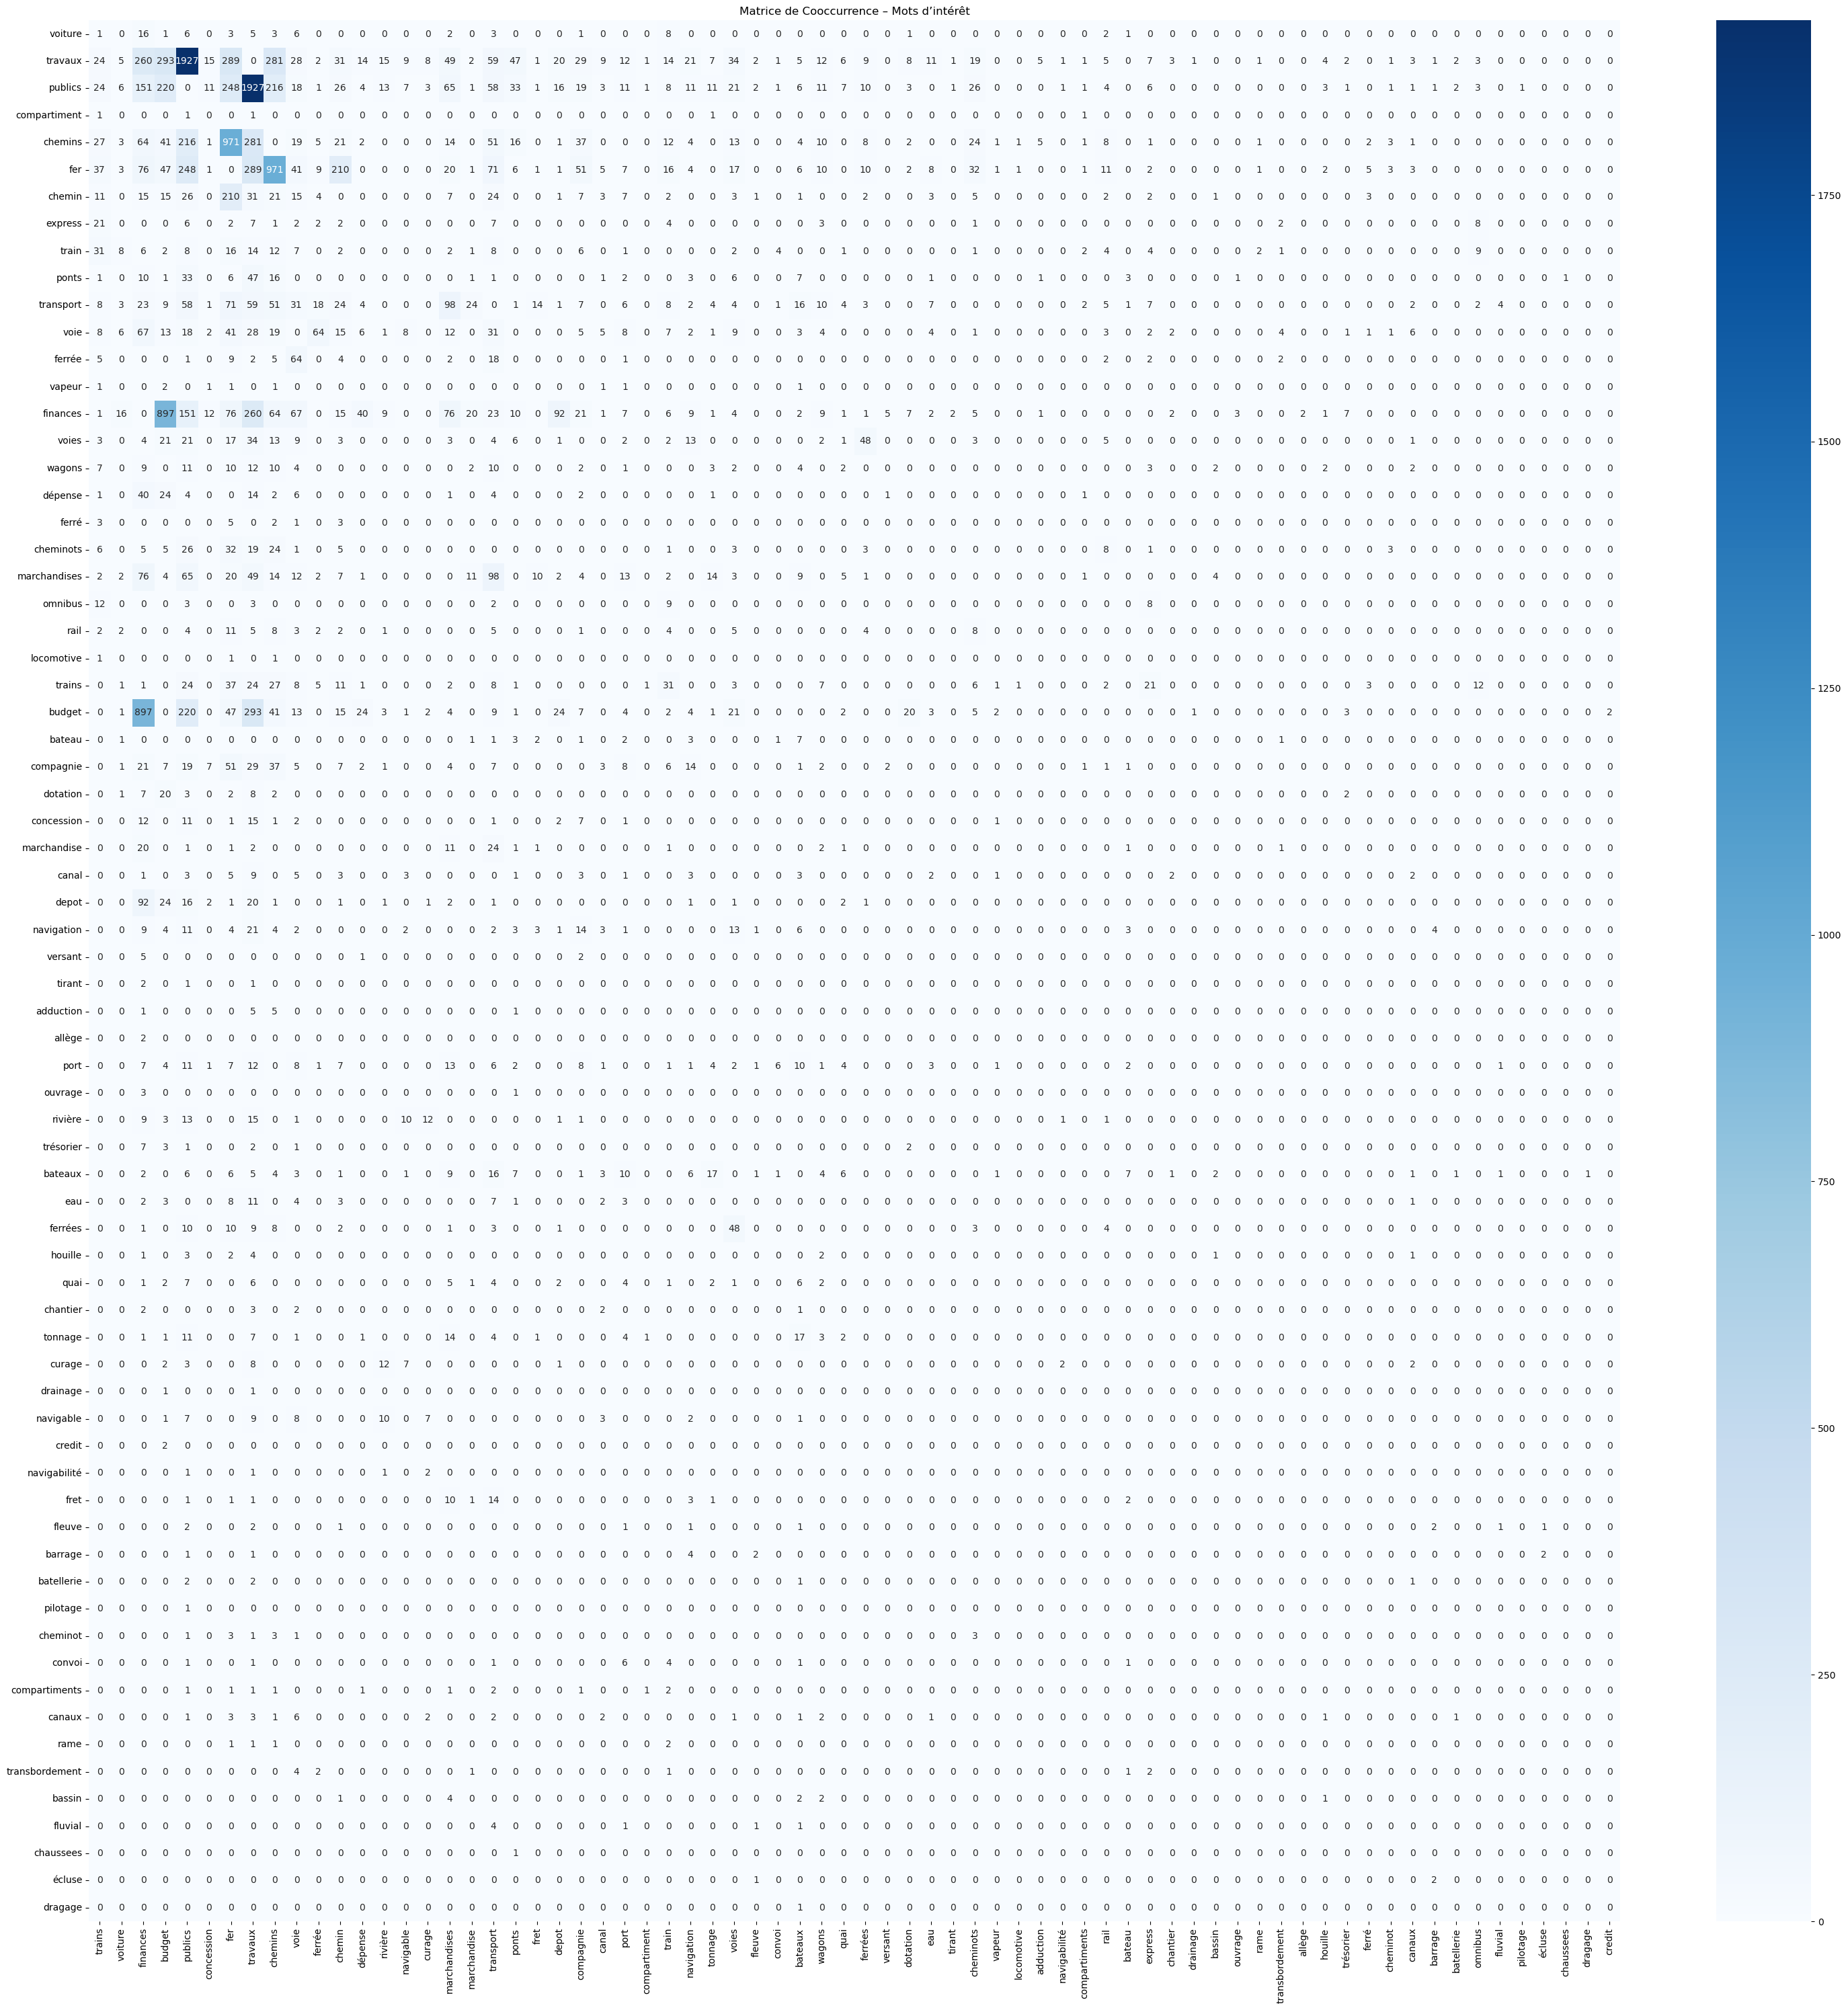

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

def matrice_cooccurrence_complete(texte, mots_interet, taille_fenetre=10):
    tokens = word_tokenize(texte.lower())
    matrice = defaultdict(lambda: defaultdict(int))

    for i in range(len(tokens)):
        mot_central = tokens[i]
        if mot_central not in mots_interet:
            continue
        fenetre = tokens[max(0, i - taille_fenetre): i] + tokens[i+1: i+1 + taille_fenetre]
        for mot_contexte in fenetre:
            if mot_contexte in mots_interet and mot_central != mot_contexte:
                matrice[mot_central][mot_contexte] += 1

    df = pd.DataFrame(matrice).fillna(0).astype(int)
    return df

texte = longue_chaine

#================================================
#Attention, si la taille de la liste est trop importante, tout les mots n'apparaîtront peut-être pas dans la matrice affichée 
#Ci-dessous, voir la définition de la taille de l'image plus bas figsize
liste_navig =["freycinet", "gabarit", "Tardieu",
              "halage", "curage", "dragage", "transbordement", "cabotage",
              "irrigation", "adduction", "drainage", "canalisée", "mouillage", "canalisation",
              "péniche",  'bateau', "bateaux", "gabare", "allège", "convoi", "automoteur", "chaland", 
              'remorqueur', "bac", "fret", "tonnage",
              "tirant","écluse", 'fluvial', "fleuve", "rivière", "affluent","riviere", "canal", "canaux",
              "bassin", "versant", "flux",
              'batellerie', 'navigable',"navigation", "navigabilité", "pilotage",
              "transport", "houille",  "marchandise", 
              "eau", "inondation", "barrage",  "chantier",
              "ascenseur", "embarcation", "port", "quai",
              "ponts", "chaussees","travaux", "publics", "finances", "credit", "dotation", "budget", "dépense","tresor","utilite",
               "amenagement","infrastructure","concession","maitrise","ouvrage","questeur","trésorier","compagnie",
               

               "train", "trains", "rail", "chemin", "chemins", "fer", "chemin de fer", "voie", "voies", "ferré", "ferrée", "ferrés", "ferrées",
                "Acier", "Ballast", "Gare", "depot", "Chauffeur", "controleur", "cheminot", "cheminots",
                "Autorail", "rame", "locomotive", "electrique","vapeur",
                "voiture", "wagons",
                "compartiment", "compartiments", "express", "omnibus",
                "marchandises"
              ]

matrice_df = matrice_cooccurrence_complete(texte, liste_navig, taille_fenetre=30)
#================================================



plt.figure(figsize=(20, 25))
sns.heatmap(matrice_df, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title("Matrice de Cooccurrence – Mots d’intérêt")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
import os
from tqdm import tqdm 


def ouvrir_decennie(chemin,decennie):

    #Important de réinitialiser afin de ne pas cumuler l'information
    texte_fin = ''

    fichiers = [f for f in os.listdir(chemin) if f.endswith('.txt')]
    fichiers_decennie = []

    for fichier in fichiers:
        try:
            annee = int(fichier.split('-')[0])
            if decennie <= annee < decennie + 10:
                fichiers_decennie.append(fichier)
        except ValueError:
            print(f"Nom de fichier ignoré : {fichier}")

    fichiers_decennie.sort()

    for fichier in tqdm(fichiers_decennie):
        chemin = os.path.join(dossier, fichier)
        with open(chemin, 'r', encoding='utf-8') as f:
            texte_fin += f.read()

    print(f"{len(fichiers_decennie)} fichiers chargés pour la décennie {decennie}s.")
    return texte_fin


#===============================================
decennie = 1880
chemin = 'C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted'

#===============================================

longue_chaine_decennie = ouvrir_decennie(chemin,decennie)


In [ ]:
import re
from tqdm import tqdm

def compter_cooccurrences_unique(texte_fin,decennie, mot1, mot2, taille_fenetre=5):
    """
    Compte les cooccurrences uniques de deux mots dans un texte.
    À chaque cooccurrence détectée, les mots cibles sont supprimés du texte pour éviter les répétitions.
    """
    # Mise en minuscules et tokenisation
    texte = ouvrir_decennie(texte_fin,decennie)
    texte = texte.lower()
    mots = re.findall(r'\b\w+\b', texte)
    mots_restants = mots.copy()

    compteur = 0
    occurences = []

    i = 0
    pbar = tqdm(total=len(mots_restants) - taille_fenetre + 1, desc="Analyse en cours")

    while i <= len(mots_restants) - taille_fenetre:
        fenetre = mots_restants[i:i + taille_fenetre]

        if {mot1, mot2}.issubset(set(fenetre)):
            compteur += 1

            # Mise en évidence
            fenetre_mise_en_evidence = [
                f"**{mot}**" if mot == mot1 or mot == mot2 else mot for mot in fenetre
            ]
            occurences.append(" ".join(fenetre_mise_en_evidence))

            # Supprimer la première occurrence de mot1 dans la fenêtre
            for j in range(i, i + taille_fenetre):
                if mots_restants[j] == mot1:
                    mots_restants[j] = "<supprimé1>"
                    break

            # Supprimer la première occurrence de mot2 dans la fenêtre
            for j in range(i, i + taille_fenetre):
                if mots_restants[j] == mot2:
                    mots_restants[j] = "<supprimé2>"
                    break

            # Avancer de toute la fenêtre pour éviter chevauchement excessif
            i += taille_fenetre
            pbar.update(taille_fenetre)
        else:
            i += 1
            pbar.update(1)

    pbar.close()
    dico_decennie = {decennie:occurence}
    return compteur, occurences, dico_decennie


#==================================================

# Remplace ici par ton texte long
texte_fin = chemin  
decennie = 1880
mot1 = "travaux"
mot2 = "canal"
taille_fenetre = 30

resultat, occurences, dictionnaire_decennie = compter_cooccurrences_unique(texte_fin, chemin, mot1, mot2, taille_fenetre)
#==================================================

print(f"\n🔎 Nombre de cooccurrences uniques de '{mot1}' et '{mot2}' : {resultat} pour la décennie {decennie}\n")
print("📌 Fenêtres extraites (sans répétitions) :")
for occ in occurences:
    print(f"- {occ}")


Analyse en cours: 100%|██████████| 34462205/34462205 [01:26<00:00, 398368.83it/s]



🔎 Nombre de cooccurrences uniques de 'travaux' et 'canal' : 272 pour la décennie 1880

📌 Fenêtres extraites (sans répétitions) :
- de commissaire du gouvernement pour assister le ministre des **travaux** publics devant la chambre des députés et devant le sénat dans la discussion du projet de loi relatif au **canal**
- de lo ayant pour ohjt rétablissement d un cxnal de dombasle à saint dié art fer sont déclarés d utilité publique les **travaux** à faire pour la construction du **canal**
- d un élément variable de 0 0005 par kilomètre il prendra fin vingt ans après l ouverture du **canal** sur toute sa longueur adopté art 3 le ministre des **travaux**
- personne ne demandant la parole pour la discussion générale je donne lecture des articles art 1er sont déclarés d utilité publique les **travaux** à faire pour l amélioration du **canal**
- articles du projet la chambre consultée décide qu elle passe à la discussion des articles aart 1er sont déclarés d utilité publique les **travaux** à

## Appliquer la fonction à toutes les décennies : 
-> 1880
-> 1930

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction de similarité Jaccard (avec n-grammes)
def similarite_jaccard(texte1, texte2, n=3):
    def ngrams(texte, n):
        return set(texte[i:i+n] for i in range(len(texte)-n+1))
    ngrams1 = ngrams(texte1, n)
    ngrams2 = ngrams(texte2, n)
    intersection = len(ngrams1.intersection(ngrams2))
    union = len(ngrams1.union(ngrams2))
    return intersection / union if union != 0 else 0

# Fonction pour calculer la similarité moyenne entre deux listes de fenêtres
def similarite_periodes(fenetres1, fenetres2):
    similitudes = []
    for f1 in fenetres1:
        for f2 in fenetres2:
            score = similarite_jaccard(f1, f2)
            similitudes.append(score)
    return sum(similitudes) / len(similitudes) if similitudes else 0

# Exemple fictif de données : dictionnaire {période: liste de fenêtres}



fenetres_par_periode = {
    "1900-1909": [
        "les **travaux** sur le **canal** avancent rapidement",
        "le **canal** nécessite plus de **travaux** urgents",
    ],
    "1910-1919": [
        "des **travaux** majeurs ont été effectués sur le **canal**",
        "le **canal** est au centre des nouveaux **travaux** publics",
    ],
    "1920-1929": [
        "la modernisation du **canal** suit les **travaux** planifiés",
        "les **travaux** ont transformé le paysage du **canal**",
    ],
}

# Extraire et trier les périodes pour traitement
periodes = sorted(fenetres_par_periode.keys())

# Calculer la similarité moyenne entre toutes les paires de périodes
resultats = {}
for i in range(len(periodes)):
    for j in range(i+1, len(periodes)):
        p1, p2 = periodes[i], periodes[j]
        sim = similarite_periodes(fenetres_par_periode[p1], fenetres_par_periode[p2])
        resultats[(p1, p2)] = sim

# Préparer les données pour le graphique
diff_temps = []
similarites = []

# Pour la différence temporelle, on convertit la chaîne "1900-1909" en un entier = début de la décennie
def periode_to_int(p):
    return int(p.split("-")[0])

for (p1, p2), sim in resultats.items():
    diff = periode_to_int(p2) - periode_to_int(p1)
    diff_temps.append(diff)
    similarites.append(sim)

# Tracer la similarité en fonction de la distance temporelle
plt.figure(figsize=(8,5))
plt.scatter(diff_temps, similarites, color='blue')
plt.plot(diff_temps, similarites, color='orange', linestyle='--')
plt.title("Évolution de la similarité contextuelle entre périodes")
plt.xlabel("Différence temporelle (années)")
plt.ylabel("Similarité Jaccard moyenne")
plt.grid(True)
plt.show()
